In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import spacy
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.matcher import PhraseMatcher
from scipy.sparse import hstack
from scipy import sparse
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Load

In [2]:
data = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_flattened.csv")

In [3]:
data.head()

,job_id,industry_id,salary_id,max_salary_x,med_salary_x,min_salary_x,pay_period_x,currency_x,compensation_type_x,company_name,...,company_size,state,country,city,zip_code_y,address,url,industry,inferred,type
0,3887470552,54,2.0,25.0,NaN,23.0,HOURLY,USD,BASE_SALARY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3884431523,56,3.0,120000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY,Energy Fuels Inc,...,2.0,Colorado,US,Lakewood,80228,225 Union Blvd.,https://www.linkedin.com/company/energy-fuels-...,Mining,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
2,3884911725,12,4.0,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
3,3884911725,17,4.0,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
4,3884911725,15,4.0,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN


#### Data Description

In [ ]:
# csv_content = """Column Name,Description,CSV
# job_id,"The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/ job_id)","job_postings.csv"
# company_id,"Identifier for the company associated with the job posting (maps to companies.csv)","job_postings.csv"
# title,"Job title.","job_postings.csv"
# description,"Job description.","job_postings.csv"
# max_salary,"Maximum salary","job_postings.csv"
# med_salary,"Median salary","job_postings.csv"
# min_salary,"Minimum salary","job_postings.csv"
# pay_period,"Pay period for salary (Hourly, Monthly, Yearly)","job_postings.csv"
# formatted_work_type,"Type of work (Fulltime, Parttime, Contract)","job_postings.csv"
# location,"Job location","job_postings.csv"
# applies,"Number of applications that have been submitted","job_postings.csv"
# original_listed_time,"Original time the job was listed","job_postings.csv"
# remote_allowed,"Whether job permits remote work","job_postings.csv"
# views,"Number of times the job posting has been viewed","job_postings.csv"
# job_posting_url,"URL to the job posting on a platform","job_postings.csv"
# application_url,"URL where applications can be submitted","job_postings.csv"
# application_type,"Type of application process (offsite, complex/simple onsite)","job_postings.csv"
# expiry,"Expiration date or time for the job listing","job_postings.csv"
# closed_time,"Time to close job listing","job_postings.csv"
# formatted_experience_level,"Job experience level (entry, associate, executive, etc)","job_postings.csv"
# skills_desc,"Description detailing required skills for job","job_postings.csv"
# listed_time,"Time when the job was listed","job_postings.csv"
# posting_domain,"Domain of the website with application","job_postings.csv"
# sponsored,"Whether the job listing is sponsored or promoted.","job_postings.csv"
# work_type,"Type of work associated with the job","job_postings.csv"
# currency,"Currency in which the salary is provided.","job_postings.csv"
# compensation_type,"Type of compensation for the job.","job_postings.csv"
# job_id,"The job ID","job_details/benefits.csv"
# type,"Type of benefit provided (401K, Medical Insurance, etc)","job_details/benefits.csv"
# inferred,"Whether the benefit was explicitly tagged or inferred through text by LinkedIn","job_details/benefits.csv"
# company_id,"The company ID as defined by LinkedIn","company_details/companies.csv"
# name,"Company name","company_details/companies.csv"
# description,"Company description","company_details/companies.csv"
# company_size,"Company grouping based on number of employees (0 Smallest - 7 Largest)","company_details/companies.csv"
# country,"Country of company headquarters.","company_details/companies.csv"
# state,"State of company headquarters.","company_details/companies.csv"
# city,"City of company headquarters.","company_details/companies.csv"
# zip_code,"ZIP code of company's headquarters.","company_details/companies.csv"
# address,"Address of company's headquarters","company_details/companies.csv"
# url,"Link to company's LinkedIn page","company_details/companies.csv"
# company_id,"The company ID","company_details/employee_counts.csv"
# employee_count,"Number of employees at company","company_details/employee_counts.csv"
# follower_count,"Number of company followers on LinkedIn","company_details/employee_counts.csv"
# time_recorded,"Unix time of data collection","company_details/employee_counts.csv"
# """

# with open("combined_csv.csv", "w", encoding="utf-8") as file:
#     file.write(csv_content)

# print("CSV file saved as combined_csv.csv")


CSV file saved as combined_csv.csv


# EDA


## Initial Exploration

In [10]:
data.drop(['med_salary_x', 'med_salary_y'], axis=1, inplace=True)

In [25]:
data.shape

(45823, 51)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45823 entries, 0 to 45822
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      45823 non-null  int64  
 1   industry_id                 45823 non-null  int64  
 2   salary_id                   45823 non-null  float64
 3   max_salary_x                45823 non-null  float64
 4   min_salary_x                45823 non-null  float64
 5   pay_period_x                45823 non-null  object 
 6   currency_x                  45823 non-null  object 
 7   compensation_type_x         45823 non-null  object 
 8   company_name                40341 non-null  object 
 9   title                       40597 non-null  object 
 10  description_x               40596 non-null  object 
 11  max_salary_y                40597 non-null  float64
 12  pay_period_y                40597 non-null  object 
 13  location                    405

In [6]:
data.describe()


,job_id,industry_id,salary_id,max_salary_x,med_salary_x,min_salary_x,max_salary_y,company_id,views,med_salary_y,...,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code_x,fips,employee_count,follower_count,company_size
count,4.582300e+04,45823.000000,45823.000000,4.582300e+04,0.0,4.582300e+04,4.059700e+04,4.034200e+04,39958.000000,0.0,...,4.059700e+04,1.670000e+02,4.059700e+04,40597.0,4.059700e+04,31749.000000,29699.000000,40282.000000,4.028200e+04,38098.000000
mean,3.896298e+09,206.457827,20575.054012,9.871696e+04,NaN,6.723654e+04,9.541622e+04,1.196085e+07,22.613219,NaN,...,1.716322e+12,1.713123e+12,1.713230e+12,0.0,2.076901e+05,54943.468739,26007.815549,18939.906182,7.881520e+05,4.629351
std,8.547570e+07,592.064379,11702.892992,5.700863e+05,NaN,4.018271e+05,6.031275e+05,2.559624e+07,143.850539,NaN,...,2.542537e+09,4.121305e+08,3.811077e+08,0.0,4.894051e+06,33659.620724,16667.529900,61960.471365,3.057577e+06,2.134806
min,9.217160e+05,1.000000,2.000000,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.009000e+03,1.000000,NaN,...,1.712954e+12,1.712347e+12,1.712346e+12,0.0,1.000000e+00,1002.000000,1003.000000,0.000000,0.000000e+00,1.000000
25%,3.894918e+09,16.000000,10574.000000,5.332000e+01,NaN,4.100000e+01,5.200000e+01,1.307400e+04,3.000000,NaN,...,1.715487e+12,1.712670e+12,1.712894e+12,0.0,6.136000e+04,21201.000000,8031.000000,123.000000,1.421700e+04,3.000000
50%,3.901986e+09,44.000000,20609.000000,8.640000e+04,NaN,6.500000e+04,8.500000e+04,2.155610e+05,5.000000,NaN,...,1.716045e+12,1.713282e+12,1.713451e+12,0.0,9.260000e+04,60031.000000,26065.000000,1259.500000,7.255250e+04,5.000000
75%,3.904579e+09,96.000000,30557.000000,1.500000e+05,NaN,1.000000e+05,1.450000e+05,6.462746e+06,12.000000,NaN,...,1.716090e+12,1.713451e+12,1.713482e+12,0.0,1.350000e+05,90401.000000,39035.000000,10480.333333,3.515244e+05,7.000000
max,3.906267e+09,3253.000000,40785.000000,1.200000e+08,NaN,8.500000e+07,1.200000e+08,1.034565e+08,9975.000000,NaN,...,1.729125e+12,1.713556e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000,748029.500000,3.266054e+07,7.000000


<Axes: >

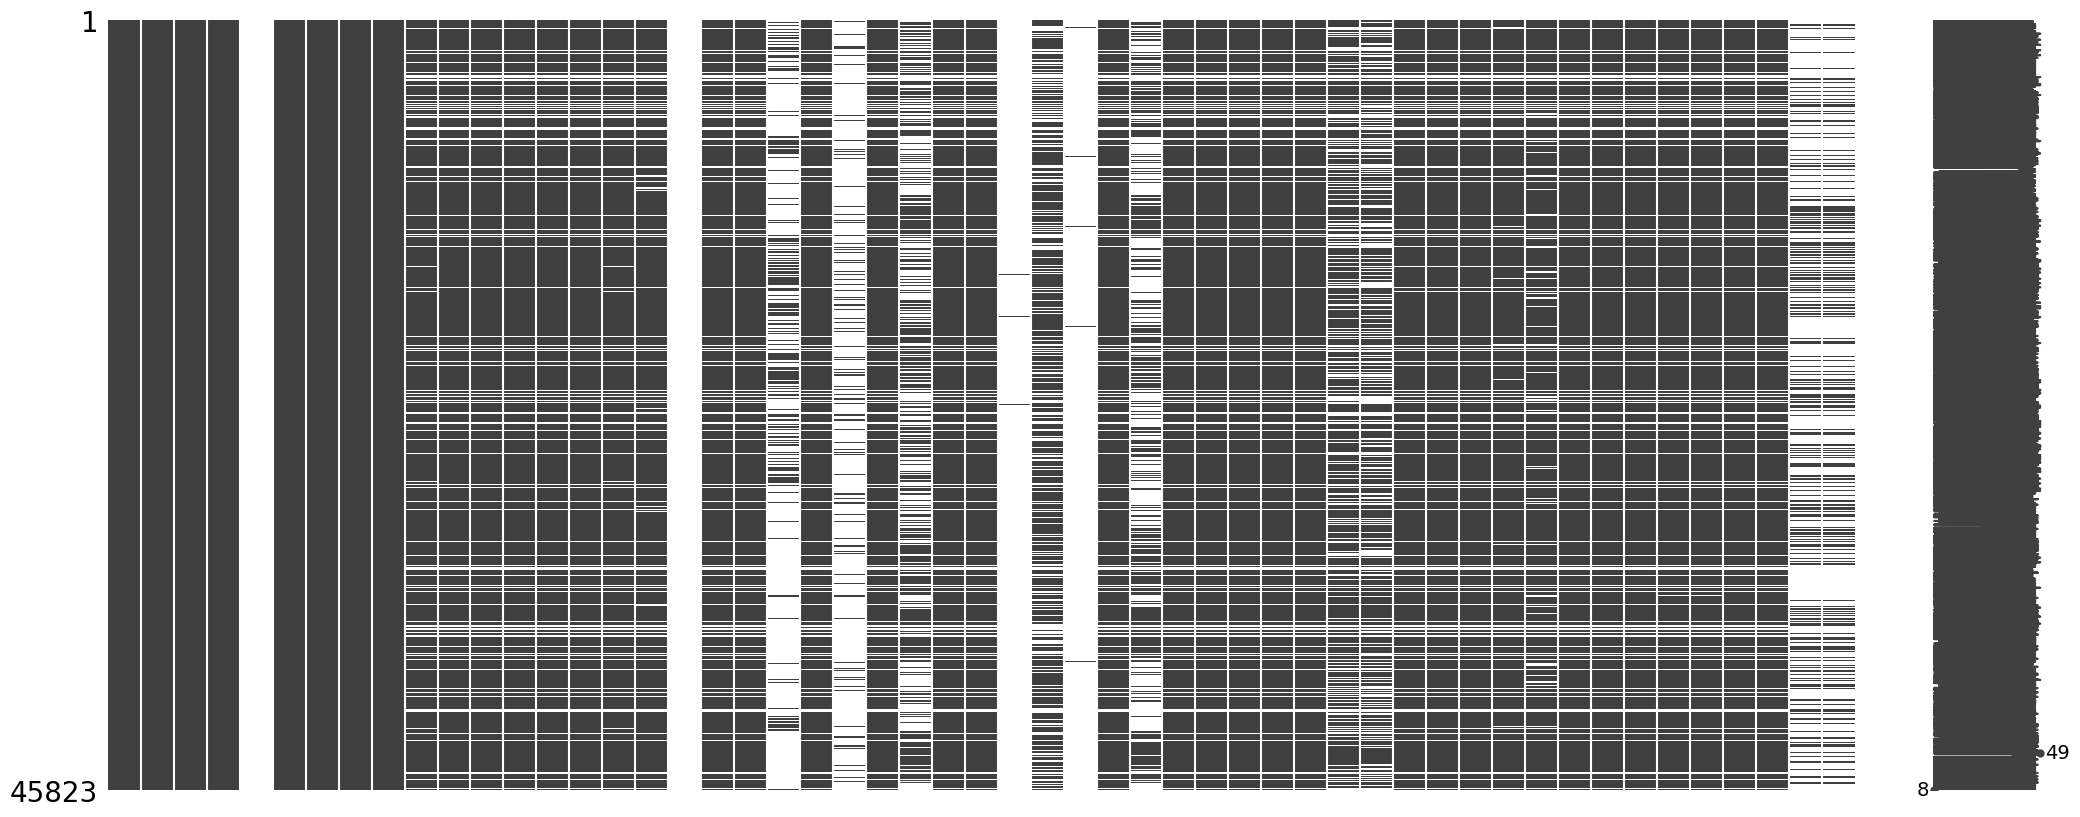

In [5]:
msno.matrix(data)


In [14]:

missing_percentage = (data.isna().sum() / len(data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(inplace=True, ascending=True)
print(missing_percentage)


title                         11.404753
max_salary_y                  11.404753
location                      11.404753
pay_period_y                  11.404753
job_posting_url               11.404753
original_listed_time          11.404753
formatted_work_type           11.404753
min_salary_y                  11.404753
application_type              11.404753
currency_y                    11.404753
normalized_salary             11.404753
compensation_type_y           11.404753
listed_time                   11.404753
sponsored                     11.404753
work_type                     11.404753
expiry                        11.404753
description_x                 11.406935
company_id                    11.961242
company_name                  11.963424
employee_count                12.092181
name                          12.092181
follower_count                12.092181
city                          12.092181
country                       12.092181
industry                      12.092181


In [18]:
# Selecting numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float', 'int64', 'float64', 'uint8', 'int32', 'float32']).columns

# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Unstack the correlation matrix and sort by absolute correlation
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]  # Remove self-correlations
correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Select the top 20 highest correlation pairs
top_20_correlations = correlation_pairs.head(30)

# Convert to DataFrame for better visualization
top_20_df = pd.DataFrame(top_20_correlations, columns=['Correlation'])
top_20_df.index.names = ['Feature 1', 'Feature 2']

display(top_20_df)

,,Correlation
Feature 1,Feature 2,
min_salary_x,min_salary_y,1.000000
max_salary_x,max_salary_y,1.000000
max_salary_y,max_salary_x,1.000000
min_salary_y,min_salary_x,1.000000
listed_time,closed_time,0.999937
closed_time,listed_time,0.999937
max_salary_x,min_salary_y,0.997553
min_salary_x,max_salary_y,0.997553
min_salary_y,max_salary_y,0.997553


In [ ]:
columns_na = [
    "formatted_experience_level", "zip_code_x", "fips", "application_url",
    "posting_domain", "inferred", "type", "applies",
    "skills_desc", "closed_time"
]

for i in columns_na:
    print(f"\n\n               {i}\n")
    filtered_data = datatest.dropna(subset=i)
    print(f"Number of rows after removing missing values in {i}: {len(filtered_data)} ({len(filtered_data)/45823*100:.2f}%)")
    display(filtered_data[i].head())

unique currency_x ['USD' 'CAD' 'BBD' 'EUR' 'AUD' 'GBP']
unique pay_period_x ['HOURLY' 'YEARLY' 'MONTHLY' 'WEEKLY' 'BIWEEKLY']


               formatted_experience_level

Number of rows after removing missing values in formatted_experience_level: 31894 (69.60%)


0           Associate
1    Mid-Senior level
2           Associate
3           Associate
4           Associate
Name: formatted_experience_level, dtype: object



               zip_code_x

Number of rows after removing missing values in zip_code_x: 31749 (69.29%)


0    77541.0
2    11550.0
3    11550.0
4    11550.0
9    14733.0
Name: zip_code_x, dtype: float64



               fips

Number of rows after removing missing values in fips: 29699 (64.81%)


0    48039.0
2    36059.0
3    36059.0
4    36059.0
9    36013.0
Name: fips, dtype: float64



               application_url

Number of rows after removing missing values in application_url: 23125 (50.47%)


9     https://skf-jobs.dzconnex.com/job-details/appl...
12                  https://aquent.com/find-work/195013
50    https://mwaa.wd1.myworkdayjobs.com/en-US/MWAA/...
57    https://bmo.wd3.myworkdayjobs.com/en-US/Extern...
58    https://yourlinencompany.isolvedhire.com/jobs/...
Name: application_url, dtype: object



               posting_domain

Number of rows after removing missing values in posting_domain: 20852 (45.51%)


9         skf-jobs.dzconnex.com
57    bmo.wd3.myworkdayjobs.com
66             www.aplitrak.com
67             www.aplitrak.com
68             www.aplitrak.com
Name: posting_domain, dtype: object



               inferred

Number of rows after removing missing values in inferred: 13181 (28.77%)


1        [0, 0, 0, 0]
6     [0, 0, 0, 0, 0]
7     [0, 0, 0, 0, 0]
8     [0, 0, 0, 0, 0]
12       [0, 0, 0, 0]
Name: inferred, dtype: object



               type

Number of rows after removing missing values in type: 13181 (28.77%)


1     ['Medical insurance', 'Vision insurance', 'Den...
6     ['Medical insurance', 'Vision insurance', 'Den...
7     ['Medical insurance', 'Vision insurance', 'Den...
8     ['Medical insurance', 'Vision insurance', 'Den...
12    ['Medical insurance', 'Vision insurance', 'Den...
Name: type, dtype: object



               applies

Number of rows after removing missing values in applies: 11330 (24.73%)


2     1.0
3     1.0
4     1.0
5     1.0
12    5.0
Name: applies, dtype: float64



               skills_desc

Number of rows after removing missing values in skills_desc: 216 (0.47%)


446    Prior residential maintenance experience is pr...
481    \n\nWhat You'll Bring\n\n You must have strong...
688    SYSTEM TESTING , MICROSOFT OFFICE , SOFTWARE D...
814                        jobprofile=Production Manager
815                        jobprofile=Production Manager
Name: skills_desc, dtype: object



               closed_time

Number of rows after removing missing values in closed_time: 167 (0.36%)


332    1.712347e+12
333    1.712347e+12
334    1.712347e+12
764    1.712351e+12
812    1.712353e+12
Name: closed_time, dtype: float64

In [58]:
datafull = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_flattened.csv")
datafull

,job_id,industry_id,salary_id,max_salary_x,med_salary_x,min_salary_x,pay_period_x,currency_x,compensation_type_x,company_name,...,company_size,state,country,city,zip_code_y,address,url,industry,inferred,type
0,3887470552,54,2.0,25.00,NaN,23.0,HOURLY,USD,BASE_SALARY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3884431523,56,3.0,120000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY,Energy Fuels Inc,...,2.0,Colorado,US,Lakewood,80228,225 Union Blvd.,https://www.linkedin.com/company/energy-fuels-...,Mining,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
2,3884911725,12,4.0,200000.00,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
3,3884911725,17,4.0,200000.00,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
4,3884911725,15,4.0,200000.00,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45818,3906264345,15,40779.0,50.00,NaN,40.0,HOURLY,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",...,5.0,MA,US,Natick,01760,679 Worcester Street,https://www.linkedin.com/company/talentburst,Staffing and Recruiting,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
45819,3906264345,12,40779.0,50.00,NaN,40.0,HOURLY,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",...,5.0,MA,US,Natick,01760,679 Worcester Street,https://www.linkedin.com/company/talentburst,Staffing and Recruiting,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
45820,3902866633,62,40783.0,21.53,NaN,21.1,HOURLY,USD,BASE_SALARY,Wabtec Corporation,...,7.0,Pennsylvania,US,Pittsburgh,15212,30 Isabella St,https://www.linkedin.com/company/wabtec-corpor...,Railroad Equipment Manufacturing,NaN,NaN
45821,3902879720,27,40784.0,125000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# START

## Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import spacy
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.matcher import PhraseMatcher
from scipy.sparse import hstack
from scipy import sparse
from sklearn.model_selection import train_test_split
import os



# Flatten

In [2]:
# salaries = salaries[(salaries['min_salary'].notna()) & (salaries['max_salary'].notna())]
# salary_posting = salaries.merge(posting, on="job_id", how="left")
# salary_posting_company = salary_posting.merge(company, on="company_id", how="left")
# job_skill_name = job_skill.merge(skill, on="skill_abr", how="left")
# job_industry_name = job_industry.merge(industry, on="industry_id", how="left")
# final = job_industry.merge(salary_posting_company, on="job_id", how="left")
# benefit_inferred_type = benefit.groupby("job_id").agg({"inferred": list, "type": list}).reset_index()
# final = final.merge(benefit_inferred_type, on="job_id", how="left")
# final.to_csv("final.csv", index=False)


# ## load
# salaries = pd.read_csv("salaries.csv")
# posting = pd.read_csv("postings.csv")
# benefit = pd.read_csv("benefits.csv")
# job_industry = pd.read_csv("job_industries.csv")
# job_skill = pd.read_csv("job_skills.csv")
# industry = pd.read_csv("industries.csv")
# skill = pd.read_csv("skills.csv")
# company = pd.read_csv("company_grouped_df.csv")

In [3]:
def load_data():
    salaries = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/salaries.csv")
    posting = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/postings.csv")
    benefit = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/benefits.csv")
    job_industry = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/job_industries.csv")
    job_skill = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/job_skills.csv")
    industry = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/industries.csv")
    skill = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/skills.csv")
    company = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Code/Merge/dataoriginal/company_grouped_df.csv")
    return salaries, posting, benefit, job_industry, job_skill, industry, skill, company


# --- Functions ---
def filter_salaries(df):
    """Filter out salary rows with missing min or max salary and print shape."""
    filtered = df[(df['min_salary'].notna()) & (df['max_salary'].notna())]
    print(filtered.shape)
    return filtered

def merge_posting(salaries, posting):
    """Merge salaries with postings on job_id and print shape."""
    merged = salaries.merge(posting, on="job_id", how="left")
    print(merged.shape)
    return merged

def merge_company(salary_posting, company):
    """Merge the salary-posting DataFrame with company info on company_id and print shape."""
    merged = salary_posting.merge(company, on="company_id", how="left")
    print(merged.shape)
    return merged

def process_job_industry(job_industry, industry):
    """Merge job_industry with industry names and print shape."""
    merged = job_industry.merge(industry, on="industry_id", how="left")
    print(merged.shape)
    return merged

def process_job_skill(job_skill, skill):
    """Merge job_skill with skill names and print shape."""
    merged = job_skill.merge(skill, on="skill_abr", how="left")
    print(merged.shape)
    return merged

def process_benefits(benefit):
    """Aggregate benefits by job_id and print shape."""
    aggregated =  benefit.groupby("job_id").agg({"inferred": list, "type": list}).reset_index()
    print(aggregated.shape)
    return aggregated

def flatten():
    # Load all datasets
    salaries, posting, benefit, job_industry, job_skill, industry, skill, company = load_data()
    print("Done Loading Files")
    
    
    # Process salary-related data
    salaries_filtered = filter_salaries(salaries)
    salary_posting = merge_posting(salaries_filtered, posting)
    salary_posting_company = merge_company(salary_posting, company)
    
    # Process job skill and industry data (if needed for further use)
    job_skill_name = process_job_skill(job_skill, skill)
    job_industry_name = process_job_industry(job_industry, industry)
    
    # Merge the salary info with job industry (using original job_industry as base)
    final = job_industry.merge(salary_posting_company, on="job_id", how="left")
    
    # Process and merge benefits
    benefit_inferred_type = process_benefits(benefit)
    final = final.merge(benefit_inferred_type, on="job_id", how="left")
    final = final[(final['salary_id'].notna())]
    
    # Write final output to CSV
    final.to_csv("df_flat.csv", index=False)
    print(final.shape)

    return final

if __name__ == "__main__":
    df_flat = flatten()
    print("Flatten complete. 'df_flat.csv' has been created.")

Done Loading Files
(33947, 8)
(33947, 38)
(33947, 50)
(213768, 3)
(164808, 3)
(30023, 3)
(45823, 53)
Flatten complete. 'df_flat.csv' has been created.


# Cleaning

In [4]:
# datatest = data.copy()

# print(f"unique currency_x {datatest['currency_x'].dropna().unique()}")
# print(f"unique pay_period_x {datatest['pay_period_x'].dropna().unique()}")
# print(f"unique application_type {datatest['application_type'].dropna().unique()}")
# print(f"unique sponsored {datatest['sponsored'].dropna().unique()}")





In [5]:
def clean(data):
    # Drop rows where either 'company_name' or 'title' is missing
    data = data.dropna(subset=['company_name', 'title', 'normalized_salary'])
    
    
    # Fill missing values
    data.loc[:, 'application_type'] = data.loc[:, 'application_type'].fillna('UnknownApply')
    data.loc[:, 'formatted_experience_level'] = data.loc[:, 'formatted_experience_level'].fillna('Other')




    ###########################################################################################################################

    # USD Standardization
    currency_conversion = {
        'USD': 1.0,   # USD to USD (no change)
        'CAD': 0.74,  # 1 CAD = 0.74 USD
        'BBD': 0.50,  # 1 BBD = 0.50 USD
        'EUR': 1.08,  # 1 EUR = 1.08 USD
        'AUD': 0.66,  # 1 AUD = 0.66 USD
        'GBP': 1.26   # 1 GBP = 1.26 USD
    }
    data.loc[:, 'max_salary_in_usd'] = data.loc[:, 'max_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)
    data.loc[:, 'min_salary_in_usd'] = data.loc[:, 'min_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)

    # Standardize pay period to hourly
    pay_period_conversion = {
        'HOURLY': 1,           # No conversion needed
        'YEARLY': 1 / 2080,     # Convert yearly salary to hourly
        'MONTHLY': 1 / 173.33,  # Convert monthly salary to hourly
        'WEEKLY': 1 / 40,       # Convert weekly salary to hourly
        'BIWEEKLY': 1 / 80      # Convert biweekly salary to hourly
    }
    data.loc[:, 'max_hourly_salary_in_usd'] = data.loc[:, 'max_salary_in_usd'] * data.loc[:, 'pay_period_x'].map(pay_period_conversion)
    data.loc[:, 'min_hourly_salary_in_usd'] = data.loc[:, 'min_salary_in_usd'] * data.loc[:, 'pay_period_x'].map(pay_period_conversion)
    data.loc[:, 'mean_hourly_salary_in_usd'] = (data.loc[:, 'max_hourly_salary_in_usd'] + data.loc[:, 'min_hourly_salary_in_usd']) / 2

    ##### DATE TIME CONVERSIONS

    # Convert 'listed_time' (in ms) to datetime and extract date and time
    data.loc[:, 'liteddatetime'] = pd.to_datetime(data.loc[:, 'listed_time'], unit='ms', utc=True)
    data.loc[:, 'ListedDate'] = data.loc[:, 'liteddatetime'].dt.date
    data.loc[:, 'ListedTime'] = data.loc[:, 'liteddatetime'].dt.time
    data.drop(columns=['liteddatetime'], inplace=True)

    # Convert 'expiry' (in ms) to datetime and extract date and time
    data.loc[:, 'expiryddatetime'] = pd.to_datetime(data.loc[:, 'expiry'], unit='ms', utc=True)
    data.loc[:, 'ExpieryDate'] = data.loc[:, 'expiryddatetime'].dt.date
    data.loc[:, 'ExpieryTime'] = data.loc[:, 'expiryddatetime'].dt.time
    data.drop(columns=['expiryddatetime'], inplace=True)

    # Convert 'original_listed_time' (in ms) to datetime and extract date and time
    data.loc[:, 'Originaldatetime'] = pd.to_datetime(data.loc[:, 'original_listed_time'], unit='ms', utc=True)
    data.loc[:, 'OriginalDate'] = data.loc[:, 'Originaldatetime'].dt.date
    data.loc[:, 'OriginalTime'] = data.loc[:, 'Originaldatetime'].dt.time
    data.drop(columns=['Originaldatetime'], inplace=True)


    ###########################################################################################################################
    def clean_benefits(x):
        # Check if the input is list-like (list or numpy array)
        if isinstance(x, (list, tuple)):
            # Filter out any NaN values and clean each item
            cleaned = [str(item).strip().strip('"') for item in x if not pd.isna(item)]
            return cleaned
        else:
            # For scalar values, check for NaN and clean if not NaN
            if pd.isna(x):
                return []
            else:
                return [str(x).strip().strip('"')]


    # Apply a function (e.g., clean_benefits) to the 'type' column
    data.loc[:, 'type_list'] = data.loc[:, 'type'].apply(clean_benefits)

    # First, print all unique benefit values:
    unique_benefits = set(item for sublist in data['type_list'] for item in sublist)
    #print("Unique benefits:", unique_benefits)

    # Next, explode the list into individual rows so each benefit gets its own row.
    exploded = data.explode('type_list')

    # Create dummy variables: 1 if the benefit is present, 0 if not.
    dummies = exploded['type_list'].str.get_dummies()

    # Since exploding creates multiple rows per original record, group by the original index 
    # and take the maximum (so if a benefit appears in any row, it will be 1).
    dummies = dummies.groupby(dummies.index).max()

    # Join the dummy columns back into the original DataFrame.
    data = data.join(dummies)

    # Optionally, drop the original 'type' and temporary 'type_list' columns.
    data.drop(columns=['type', 'type_list'], inplace=True)


    ###########################################################################################################################

    ad0 = ['views', 'applies', 'remote_allowed', 'employee_count', 'company_size' ]
    data[ad0] = data[ad0].fillna(0)


    ###########################################################################################################################

    # Create binary column 'compappkication'
    data.loc[:, 'CompApplication'] = data.apply(
        lambda row: 1 if pd.notnull(row['application_url']) and row['application_url'] != "" and str(row['company_name']).lower() in str(row['application_url']).lower() else 0,
        axis=1
    )

    ###########################################################################################################################
    ##" Dropping columns that are not needed for the analysis"
    
    dropColumns = ['closed_time', 'closed_time', 'expiry', 'listed_time', 'inferred', 'max_salary_y', 'min_salary_y', 'fips', 'original_listed_time']
    drop2 = ['med_salary_x', 'max_salary_x', 'min_salary_x', 'med_salary_y', 'currency_y', 'pay_period_y', 'pay_period_x', 'OriginalDate', 'OriginalTime', 'zip_code_x', 'posting_domain', 'name', 'skills_desc', 'application_url']
    data.drop(columns=dropColumns, inplace=True)
    data.drop(columns=drop2, inplace=True)
    
    
    ###########################################################################################################################
    ### Dumifying object

    # feature_column = 'extracted_skills'

    # # Convert string representations of lists into actual lists
    # data[feature_column] = data[feature_column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # # Create a set of all unique skills
    # all_features = set()
    # for features in data[feature_column]:
    #     if isinstance(features, list):
    #         all_features.update([f.lower() for f in features])  # Convert to lowercase
    
    # # Create binary columns for each unique skill
    # for feature in sorted(all_features):
    #     data[f'feature_{feature}'] = data[feature_column].apply(
    #         lambda x: 1 if isinstance(x, list) and feature in [f.lower() for f in x] else 0
    #     )
    

    # for col in data.select_dtypes(include=['object']).columns:
    #     data = pd.get_dummies(data, columns=[col], drop_first=True)

    ###########################################################################################################################
    ### drop all remaining missing values
    data.dropna(inplace=True)

    return data





In [6]:
#data = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_flattened.csv")

df_clean = clean(df_flat)

C:\Users\felix\AppData\Local\Temp\ipykernel_13268\3465038532.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'max_salary_in_usd'] = data.loc[:, 'max_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)
C:\Users\felix\AppData\Local\Temp\ipykernel_13268\3465038532.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'min_salary_in_usd'] = data.loc[:, 'min_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)
C:\Users\felix\AppData\Local\Temp\ipykernel_13268\34

In [7]:
num_rows = df_clean.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 39958


# Text Analytics

### Description

In [ ]:
def process_job_description_pipeline(dataclean):
    # --- Step 1: Merge and Preprocess Job Descriptions ---
    # Load spaCy's English model
    nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "textcat"])
    
    # Merge the two description columns into one full description
    dataclean['full_description'] = dataclean['description_x'].fillna('') + " " + dataclean['description_y'].fillna('')
    
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'\s+', ' ', text)
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc 
                  if token.pos_ in ['NOUN', 'PROPN'] and token.is_alpha and not token.is_stop]
        return ' '.join(tokens)
    
    dataclean['cleaned_full_description'] = dataclean['full_description'].apply(clean_text)
    
    # --- Step 2: Candidate Keyword Extraction via TF-IDF ---
    tfidf_vectorizer_candidates = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix_candidates = tfidf_vectorizer_candidates.fit_transform(dataclean['cleaned_full_description'])
    feature_names = tfidf_vectorizer_candidates.get_feature_names_out()
    tfidf_scores = np.array(tfidf_matrix_candidates.sum(axis=0)).flatten()
    tfidf_word_scores = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    
    # Define banned words (generic words not representative of specific job assets)
    banned_words = set([
        "experience", "company", "candidate", "role", "skill", "job", "career",
        "industry", "organization", "people", "work", "business", "community", "year",
        "process", "method", "system", "result", "output", "quality", "standard", "support",
        "report", "metric", "knowledge", "firm", "level", "talent",
        "team", "client", "service", "customer", "project", "management", "product",
        "employee", "solution", "opportunity", "care",  "time", "benefit",
        "position", "program", "ability",  
        "staffing", "status", "life","world", "day", "office", "range",
        "manager", "employment", "requirement",
        "department", "division", "partner", "partnership", "relationship", "corporate",
        "internal", "external",
        "project management", "customer service", "team building", "business development",
        "dynamic", "innovative", "proactive", "passionate", "motivated", "experienced", "success",
        "dedicated", "driven", "collaborative", "organized", "flexible", "ii", "chicago", "tool", "pay", "applicant", "compensation", "value", 'area'
    ])
    
    filtered_tfidf_word_scores = [(word, score) for word, score in tfidf_word_scores if word not in banned_words]
    top_n = 50
    top_candidates = [word for word, score in filtered_tfidf_word_scores[:top_n]]
    
    # --- Step 3: Extract Explicit Skills/Traits Using a Dictionary-Based Approach ---
    # Use the top candidates as the skills list.
    skills_list = top_candidates
    matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
    patterns = [nlp.make_doc(skill) for skill in skills_list]
    matcher.add("SKILL", patterns)
    
    def extract_skills(text):
        doc = nlp(text)
        matches = matcher(doc)
        skills_found = set()
        for match_id, start, end in matches:
            span = doc[start:end]
            skills_found.add(span.text.lower())
        return list(skills_found)
    
    dataclean['extracted_skills'] = dataclean['full_description'].apply(extract_skills)
    
    # Create binary (dummy) features for each skill in skills_list.
    def create_skill_features(text, skills):
        features = {}
        for skill in skills:
            features[skill] = 1 if skill in text else 0
        return features
    
    skill_features = dataclean['full_description'].apply(lambda text: create_skill_features(text, skills_list))
    skills_df = pd.DataFrame(skill_features.tolist(), index=dataclean.index)
    
    # --- Step 4: Generate Contextual Features Using TF-IDF ---
    tfidf_vectorizer_context = TfidfVectorizer(max_features=50)
    tfidf_features_context = tfidf_vectorizer_context.fit_transform(dataclean['full_description'])
    
    # --- Step 5: Combine Feature Sets ---
    skills_sparse = sparse.csr_matrix(skills_df.values)
    combined_features = hstack([tfidf_features_context, skills_sparse])
    
    # --- Step 6: Append the Combined Features to a New Column ---
    combined_features_dense = combined_features.toarray()
    dataclean['combined_features'] = list(combined_features_dense)
    
    return dataclean, skills_df


processed_df, skills_df = process_job_description_pipeline(df_clean)
print(processed_df[['extracted_skills', 'combined_features']].head())

data_clean_text_A = processed_df.copy()


In [ ]:
print(skills_df.columns)

Index(['accounting', 'development', 'technology', 'sale', 'engineering',
       'information', 'marketing', 'software', 'law', 'healthcare',
       'application', 'design', 'location', 'datum', 'disability', 'account',
       'responsibility', 'health', 'cost', 'market', 'insurance',
       'performance', 'security', 'growth', 'resource', 'culture', 'salary',
       'test', 'need', 'environment', 'patient', 'practice', 'agency',
       'family', 'individual', 'member', 'group', 'compensation', 'operation',
       'risk', 'communication', 'inventory', 'degree', 'recruitment',
       'professional', 'value', 'area', 'qualification', 'plan', 'success'],
      dtype='object')


In [ ]:
display(data_clean_text_A[['full_description', 'extracted_skills', 'combined_features']].head())

,full_description,extracted_skills,combined_features
1,GENERAL PURPOSE:Under the general direction of...,"[accounting, Health, product, Opportunity, pro...","[0.0, 0.023717786689563005, 0.0645417159810364..."
2,Territory Sales Manager - Medical Sales\nMy cl...,"[market, plan, staffing, Opportunity, training...","[0.04253479192415507, 0.06880608563084971, 0.0..."
3,Territory Sales Manager - Medical Sales\nMy cl...,"[market, plan, staffing, Opportunity, training...","[0.04253479192415507, 0.06880608563084971, 0.0..."
4,Territory Sales Manager - Medical Sales\nMy cl...,"[market, plan, staffing, Opportunity, training...","[0.04253479192415507, 0.06880608563084971, 0.0..."
5,"Our client, a financial services company, is l...","[market, Software, product, Project, project, ...","[0.0, 0.05280396464270182, 0.0, 0.543747606719..."


### Title Text clean

In [ ]:
def extract_title_clean(dataclean, top_n=10, banned_words=None, min_score_threshold=0.0):
    
    if banned_words is None:
        banned_words = {""}
    
    # Step 1: Compute global TF‑IDF scores for bigrams
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(dataclean['title'].fillna(''))
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()
    
    # Create a list of (bigram, score) pairs sorted by score (highest first)
    bigram_scores = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)
    
    # Build allowed candidate dictionary with exactly top_n bigrams
    allowed_bigrams = {}
    for bigram, score in bigram_scores:
        if bigram in banned_words or score < min_score_threshold:
            continue
        allowed_bigrams[bigram] = score
        if len(allowed_bigrams) >= top_n:
            break
    
    # Create a set of allowed bigrams for O(1) lookup
    allowed_bigram_set = set(allowed_bigrams.keys())
    
    def find_most_similar_bigram(title):
        """Find the most similar allowed bigram based on word overlap."""
        title_words = set(title.lower().split())
        max_overlap = 0
        best_bigram = list(allowed_bigrams.keys())[0]  # Default to highest TF-IDF bigram
        
        for bigram in allowed_bigrams:
            bigram_words = set(bigram.split())
            overlap = len(title_words & bigram_words)
            if overlap > max_overlap:
                max_overlap = overlap
                best_bigram = bigram
            elif overlap == max_overlap:
                # If same overlap, choose the one with higher TF-IDF score
                if allowed_bigrams[bigram] > allowed_bigrams[best_bigram]:
                    best_bigram = bigram
        
        return best_bigram
    
    def get_best_bigram(title):
        if pd.isna(title):
            return list(allowed_bigrams.keys())[0]  # Default to highest TF-IDF bigram
        
        title_lower = title.lower().strip()
        matching_candidates = []
        
        # First try exact matches
        for candidate in allowed_bigrams:
            pattern = r'\b' + re.escape(candidate).replace(r'\ ', r'\s+') + r'\b'
            if re.search(pattern, title_lower):
                matching_candidates.append(candidate)
        
        if matching_candidates:
            # Choose the candidate with the highest global TF‑IDF score
            return sorted(matching_candidates, key=lambda c: allowed_bigrams[c], reverse=True)[0]
        
        # If no exact matches, find the most similar allowed bigram
        return find_most_similar_bigram(title_lower)
    
    dataclean['TitleClean'] = dataclean['title'].apply(get_best_bigram)
    return dataclean

def higher_level_mapping(data):
    title_mapping = {
        # Project/Product Management
        "project manager": "Project/Product Management",
        "program manager": "Project/Product Management",
        "project coordinator": "Project/Product Management",
        "senior project": "Project/Product Management",
        "construction project": "Project/Product Management",
        "construction superintendent": "Project/Product Management",
        "product manager": "Project/Product Management",
        "senior product": "Project/Product Management",

        # Software Engineering
        "software engineer": "Software Engineering",
        "senior software": "Software Engineering",
        "development engineer": "Software Engineering",
        "network engineer": "Software Engineering",
        "security engineer": "Software Engineering",
        "systems engineer": "Software Engineering",
        "engineering manager": "Software Engineering",
        "project engineer": "Software Engineering",
        "field service": "Software Engineering",

        # Data & Analytics
        "data scientist": "Data & Analytics",
        "data analyst": "Data & Analytics",
        "data engineer": "Data & Analytics",
        "business analyst": "Data & Analytics",
        "financial analyst": "Data & Analytics",
        "senior data": "Data & Analytics",

        # Sales & Business Development
        "sales representative": "Sales & Business",
        "sales associate": "Sales & Business",
        "sales consultant": "Sales & Business",
        "sales manager": "Sales & Business",
        "business development": "Sales & Business",
        "sales executive": "Sales & Business",
        "account executive": "Sales & Business",
        "inside sales": "Sales & Business",
        "outside sales": "Sales & Business",
        "sales specialist": "Sales & Business",
        "sales development": "Sales & Business",
        "account manager": "Sales & Business",
        "store manager": "Sales & Business",
        "assistant store": "Sales & Business",
        "development representative": "Sales & Business",
        "development manager": "Sales & Business",

        # Customer Support
        "support specialist": "Customer Support",
        "customer service": "Customer Support",
        "service representative": "Customer Support",
        "technical support": "Customer Support",
        "service technician": "Customer Support",
        "maintenance technician": "Customer Support",
        "field service": "Customer Support",
        "information technology": "Customer Support",

        # Accounting & Finance
        "accounting manager": "Accounting & Finance",
        "staff accountant": "Accounting & Finance",
        "senior accountant": "Accounting & Finance",
        "financial advisor": "Accounting & Finance",
        "tax manager": "Accounting & Finance",
        "senior tax": "Accounting & Finance",
        "senior financial": "Accounting & Finance",
        "finance manager": "Accounting & Finance",
        "accounts payable": "Accounting & Finance",
        "accounts receivable": "Accounting & Finance",
        "payroll specialist": "Accounting & Finance",

        # Marketing
        "marketing specialist": "Marketing",
        "marketing manager": "Marketing",

        # Engineering & Manufacturing
        "manufacturing engineer": "Engineering",
        "design engineer": "Engineering",
        "quality engineer": "Engineering",
        "test engineer": "Engineering",
        "process engineer": "Engineering",
        "mechanical engineer": "Engineering",
        "electrical engineer": "Engineering",
        "engineer ii": "Engineering",
        "quality assurance": "Engineering",

        # Operations & HR
        "human resources": "Operations & HR",
        "resources manager": "Operations & HR",
        "operations manager": "Operations & HR",
        "operations specialist": "Operations & HR",
        "resources generalist": "Operations & HR",
        "administrative assistant": "Operations & HR",
        "assistant manager": "Operations & HR",
        "office manager": "Operations & HR", 
        "executive assistant": "Operations & HR",

        # Medical & Healthcare
        "registered nurse": "Medical & Healthcare",
        "nurse practitioner": "Medical & Healthcare",
        "physical therapist": "Medical & Healthcare",
        "medical assistant": "Medical & Healthcare",
        "mental health": "Medical & Healthcare",
        "home health": "Medical & Healthcare",
        "travel rn": "Medical & Healthcare",
        "med surg": "Medical & Healthcare",
        "nurse rn": "Medical & Healthcare",

        # Legal & Real Estate
        "legal assistant": "Legal & Real Estate",
        "associate attorney": "Legal & Real Estate",
        "litigation associate": "Legal & Real Estate",
        "real estate": "Legal & Real Estate",

        # Senior Leadership & Management
        "senior manager": "Senior Leadership",
        "senior director": "Senior Leadership",
        "associate director": "Senior Leadership",
        "vice president": "Senior Leadership",
        "general manager": "Senior Leadership",

        # Logistics & Supply Chain
        "warehouse associate": "Logistics & Supply Chain",
        "supply chain": "Logistics & Supply Chain",

        # Other Roles
        "entry level": "Other",
        "2nd shift": "Other"
    }

    #### Verify Mapping###
    mapped_title = set(title_mapping.keys())
    existing_title = set(data["TitleClean"].unique())
    unmapped_title = existing_title - mapped_title
    print("Titles not mapped:\n")
    for i in unmapped_title:
        print(i)

    data["title_family"] = data["TitleClean"].map(title_mapping)
    print(len(data["title_family"].unique()))


    return data


# Example usage:
TOP_N = 100
data_clean_text_B = extract_title_clean(data_clean_text_A, top_n=TOP_N)
data_clean_text_C  = higher_level_mapping(data_clean_text_B)




Titles not mapped:

14


In [ ]:
# Verify we have exactly TOP_N unique values
n_unique = data_clean_text_C['TitleClean'].nunique()
print(f"Number of unique values in TitleClean: {n_unique}")
print(data_clean_text_C[['title', 'TitleClean']])


n_unique2 = data_clean_text_C['title_family'].nunique()
print(f"Number of unique values in title_family: {n_unique2}")
print(data_clean_text_C[['title', 'title_family']])

empty_percentage = (data_clean_text_C['TitleClean'].isna() | (data_clean_text_C['TitleClean'].str.strip() == "")).mean() * 100
print(f"Percentage of empty values in 'TitleClean': {empty_percentage:.2f}%")

titlelist = data_clean_text_C['TitleClean'].unique().tolist()
print(titlelist)

print(f"There is a total of {len(titlelist)} unique titles in the 'TitleClean' column.")

Number of unique values in TitleClean: 99
                                                title              TitleClean
19                                       Mine Foreman         project manager
21      Territory Sales - Medical Sales - Long Island    sales representative
22      Territory Sales - Medical Sales - Long Island    sales representative
23      Territory Sales - Medical Sales - Long Island    sales representative
24                                    Project Manager         project manager
...                                               ...                     ...
164789                               Quality Engineer        quality engineer
164790                               Quality Engineer        quality engineer
164791                               Quality Engineer        quality engineer
164802                     Warehouse Associate WMS 3W     warehouse associate
164806                       Environmental Technician  maintenance technician

[39958 rows x 2 colum

In [ ]:
data_clean_text_C.to_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/Final_DataFrame.csv", index=False)

# Final Load

In [ ]:
DataFinalLoad = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/Final_DataFrame.csv")

In [ ]:
DataFinalLoad

,job_id,industry_id,salary_id,currency_x,compensation_type_x,company_name,title,description_x,location,company_id,...,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,CompApplication,full_description,cleaned_full_description,extracted_skills,combined_features,TitleClean
0,3884431523,56,3.0,USD,BASE_SALARY,Energy Fuels Inc,Mine Foreman,GENERAL PURPOSE:Under the general direction of...,Greater Flagstaff Area,947812.0,...,0,0,0,1,0,GENERAL PURPOSE:Under the general direction of...,purpose direction superintendent position vers...,"['education', 'equipment', 'state', 'developme...",[0. 0.02371779 0.06454172 0.61997699 0...,project manager
1,3884911725,12,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
2,3884911725,17,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
3,3884911725,15,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
4,3887473220,43,5.0,USD,BASE_SALARY,Motion Recruitment,Project Manager,"Our client, a financial services company, is l...","New York, United States",5887.0,...,0,0,0,0,0,"Our client, a financial services company, is l...",client service company non project manager tea...,"['development', 'degree', 'group', 'market', '...",[0. 0.05280396 0. 0.54374761 0...,project manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39953,3906264345,17,40779.0,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I/IILocation: Irvin...,"Irvine, CA",122451.0,...,0,0,0,1,0,Position: Quality Engineer I/IILocation: Irvin...,position quality engineer iilocation irvine mo...,"['education', 'equipment', 'environment', 'sta...",[0.0275019 0.02224412 0.02017718 0.56383596 0...,quality engineer
39954,3906264345,15,40779.0,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I/IILocation: Irvin...,"Irvine, CA",122451.0,...,0,0,0,1,0,Position: Quality Engineer I/IILocation: Irvin...,position quality engineer iilocation irvine mo...,"['education', 'equipment', 'environment', 'sta...",[0.0275019 0.02224412 0.02017718 0.56383596 0...,quality engineer
39955,3906264345,12,40779.0,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I/IILocation: Irvin...,"Irvine, CA",122451.0,...,0,0,0,1,0,Position: Quality Engineer I/IILocation: Irvin...,position quality engineer iilocation irvine mo...,"['education', 'equipment', 'environment', 'sta...",[0.0275019 0.02224412 0.02017718 0.56383596 0...,quality engineer
39956,3902866633,62,40783.0,USD,BASE_SALARY,Wabtec Corporation,Warehouse Associate WMS 3W,Wabtec Corporation is a leading global provide...,"Fort Worth, TX",8239496.0,...,0,0,0,0,0,Wabtec Corporation is a leading global provide...,corporation provider equipment system solution...,"['need', 'equipment', 'development', 'informat...",[0.04308218 0.05226867 0.01580394 0.55203638 0...,warehouse ass

In [ ]:
DataFinalLoad.shape

(39958, 57)

In [ ]:
datatest = DataFinalLoad.copy()
na_percent = DataFinalLoad.isnull().mean() * 100

# Filter columns that have any missing values
na_percent = na_percent[na_percent > 0]

# Print the result, sorted by percentage in descending order
for col, pct in na_percent.sort_values(ascending=False).items():
    print(f"{col} ---> {pct:.2f}% missing")

<Axes: >

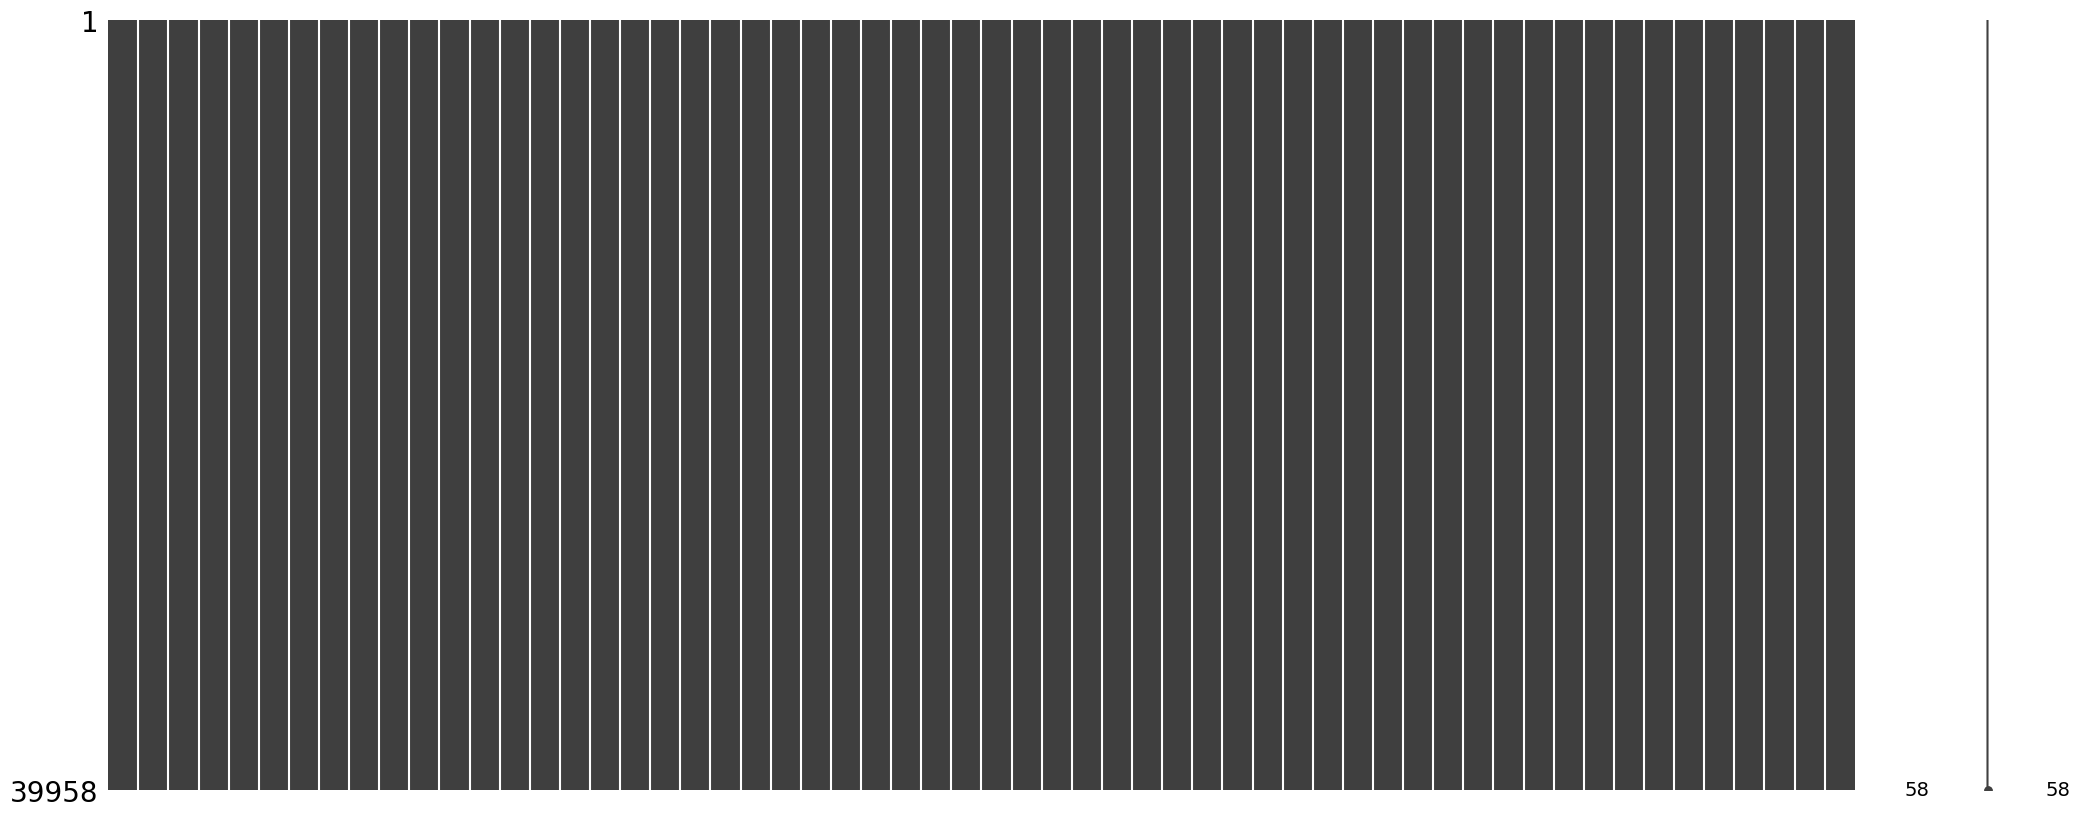

In [ ]:
msno.matrix(DataFinalLoad)
